In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
file_list = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        file_list.append(path)
        print(path)
print(file_list)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-dataset/customers_6.csv
/kaggle/input/credit-dataset/customers_2.csv
/kaggle/input/credit-dataset/customers_1.csv
/kaggle/input/credit-dataset/customers_3.csv
/kaggle/input/credit-dataset/customers_5.csv
/kaggle/input/credit-dataset/customers_4.csv
['/kaggle/input/credit-dataset/customers_6.csv', '/kaggle/input/credit-dataset/customers_2.csv', '/kaggle/input/credit-dataset/customers_1.csv', '/kaggle/input/credit-dataset/customers_3.csv', '/kaggle/input/credit-dataset/customers_5.csv', '/kaggle/input/credit-dataset/customers_4.csv']


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from datetime import date

today = date.today()
formatted_date = "/" + today.strftime("%d-%m-%Y").replace("-0", "-")
print("Today's date:", formatted_date)

Today's date: /21-6-2024


# Problem Statement: 
Stakeholders of ABC Credit company are interested in utilizing the latest advancements in Data Science to build a machine learning model. They’ve found that credit card loan defaults are posing a big problem to their bottom line profits, and would like to implement a proactive, preventive and predictive approach as part of the solution.

# Problem Statement formulation
Since credit card loan defaults are a big problem to the profits, therefore the objective of this project is to develop a predictive model that can accurately identify the likelihood of credit card loan defaults based on historical data. This model is important for the company, such as reducing financial losses and enabling proactive measures. `default`  column will be the target column for this project. Feature that contribute to the output also will be determined. 

Since we want to detect the value `1` in the target column `default` which imbalance data, we need to focus on recall metrics to increase the sensitivity of the model because it means that the model will correctly identify a higher number of actual value `1` for defaults. A higher recall for value 1 means fewer defaults are missed by the model (lower false negatives) since a low recall for defaults (value 1) means that many actual defaults are not being predicted by the model which can be costly because it means the credit company may not take necessary actions to mitigate the risk associated with these potential defaults. A higher recall for defaults for value `1` means that the model is more effective at flagging loans that are likely to default, which allows the credit company to take proactive measures.


## Data Loading

In [4]:
%%time
path_list = ['/kaggle/input/credit-dataset/customers_1.csv', '/kaggle/input/credit-dataset/customers_2.csv', 
             '/kaggle/input/credit-dataset/customers_3.csv', '/kaggle/input/credit-dataset/customers_4.csv', 
             '/kaggle/input/credit-dataset/customers_5.csv', '/kaggle/input/credit-dataset/customers_6.csv']
df_list = []
for x in path_list:
    df = pd.read_csv(x, engine='python')
    df_list.append(df)

CPU times: user 1min 34s, sys: 4.42 s, total: 1min 39s
Wall time: 1min 48s


In [5]:
%%time
df = pd.concat(df_list, axis='index')
df.head(5)

CPU times: user 345 ms, sys: 330 ms, total: 675 ms
Wall time: 672 ms


,Unnamed: 0,customer.id,date.of.report,gender,occupation,nationality,race,marital.status,age,home.address,...,date.of.last.top.up.of.prepaid.card,supplementary.prepaid.card,own.multiple.prepaid.card,prepaid.card.branch.loaction,customer.with.active.financing.product,current.loan.balance,sanctioned.amount,own.multiple.financing.products,financing.product.branch.location,default
0,1,142932463.0,20220901,Female,1d3134e05d4736dd523e8da18153fee1683082c8047194...,522733336a54c81c7cfabcc60dcf26042a4b1d59c4bdf7...,3d0ac26c46f9daaeaff34affc226f2d86300ede16934f3...,8623744e832ac4d2479a3de6c827dfb779ddb769de07f0...,29,55100,...,NaN,N,N,0,Y,2768.56,2221.0,Y,0,0
1,2,133599134.0,20220901,Male,d56baa23c666005144806b1143e76f89d80bb0d5087ac4...,522733336a54c81c7cfabcc60dcf26042a4b1d59c4bdf7...,3d0ac26c46f9daaeaff34affc226f2d86300ede16934f3...,8316f8178707dee9ea8c0e44178b4993a37244112fd60a...,26,84900,...,NaN,N,N,0,Y,17226.60,15000.0,N,1,0
2,3,142155191.0,20220901,Female,2591e99784666567fe15b2059e3f2050b0e9d1226bde8f...,522733336a54c81c7cfabcc60dcf26042a4b1d59c4bdf7...,3d0ac26c46f9daaeaff34affc226f2d86300ede16934f3...,8316f8178707dee9ea8c0e44178b4993a37244112fd60a...,29,07000,...,NaN,N,N,0,Y,9306.98,10070.0,N,1,0
3,4,110561197.0,20220901,Female,3c78d9603676c68c5f26d0f4fb2ed5026456cd799b53aa...,522733336a54c81c7cfabcc60dcf26042a4b1d59c4bdf7...,83ad5f646c236e5afc36e3f3353c6f6f8ba983653b117d...,8623744e832ac4d2479a3de6c827dfb779ddb769de07f0...,40,58000,...,NaN,N,N,0,Y,3118.96,3510.0,Y,2,1
4,5,850084597.0,20220901,Female,0be69302b80664a1f1ada55c8edd5f40cf3d5d23fbb48e...,522733336a54c81c7cfabcc60dcf26042a4b1d59c4bdf7...,3d0ac26c46f9daaeaff34affc226f2d86300ede16934f3...,8623744e832ac4d2479a3de6c827dfb779ddb769de07f0...,28,43500,...,NaN,N,N,0,N,NaN,NaN,N,3,0


In [6]:
df.columns

Index(['Unnamed: 0', 'customer.id', 'date.of.report', 'gender', 'occupation',
       'nationality', 'race', 'marital.status', 'age', 'home.address',
       'residence.type', 'educational.qualification', 'type.of.employment',
       'annual.income', 'vip.status', 'number.of.dependents',
       'mobile.app.status', 'opt.out', 'customer.with.active.credit.card',
       'current_ca_credit_limit', 'current_cp_credit_limit',
       'initial_ca_credit_limit', 'initial_cp_credit_limit',
       'own.multiple.credit.card', 'supplementary.credit.card',
       'credit.card.branch.location', 'customer.with.active.prepaid.card',
       'current.prepaid.card.balance', 'date.of.last.top.up.of.prepaid.card',
       'supplementary.prepaid.card', 'own.multiple.prepaid.card',
       'prepaid.card.branch.loaction',
       'customer.with.active.financing.product', 'current.loan.balance',
       'sanctioned.amount', 'own.multiple.financing.products',
       'financing.product.branch.location', 'default'],
  

In [7]:
df.isna().sum()

Unnamed: 0                                      0
customer.id                                     0
date.of.report                                  0
gender                                          0
occupation                                      0
nationality                                   384
race                                            0
marital.status                                 32
age                                             0
home.address                                    0
residence.type                               1842
educational.qualification                 2208750
type.of.employment                            383
annual.income                                   0
vip.status                                      0
number.of.dependents                          383
mobile.app.status                               0
opt.out                                         0
customer.with.active.credit.card                0
current_ca_credit_limit                   2354649


In [8]:
len(df) 

2434863

There are a few columns that have more that 40% of rows that contain null values. Since the total rows of the data frame is 2.4 million rows, it is better to drop the columns that contain more that 40% rows of null values. Only a few columns that contain null values will be imputed. 

In [9]:
df.drop(['educational.qualification', 'current_ca_credit_limit', 'current_cp_credit_limit',
         'initial_ca_credit_limit', 'initial_cp_credit_limit', 'current.prepaid.card.balance', 
         'date.of.last.top.up.of.prepaid.card','current.loan.balance','sanctioned.amount'], 
        axis='columns', inplace=True)
df.columns

Index(['Unnamed: 0', 'customer.id', 'date.of.report', 'gender', 'occupation',
       'nationality', 'race', 'marital.status', 'age', 'home.address',
       'residence.type', 'type.of.employment', 'annual.income', 'vip.status',
       'number.of.dependents', 'mobile.app.status', 'opt.out',
       'customer.with.active.credit.card', 'own.multiple.credit.card',
       'supplementary.credit.card', 'credit.card.branch.location',
       'customer.with.active.prepaid.card', 'supplementary.prepaid.card',
       'own.multiple.prepaid.card', 'prepaid.card.branch.loaction',
       'customer.with.active.financing.product',
       'own.multiple.financing.products', 'financing.product.branch.location',
       'default'],
      dtype='object')

### Drop irrelevant column

In [10]:
df.drop(['Unnamed: 0', 'customer.id', 'date.of.report', 'home.address', 'credit.card.branch.location',
        'prepaid.card.branch.loaction', 'financing.product.branch.location'], axis='columns', inplace=True)
df.head(1)

,gender,occupation,nationality,race,marital.status,age,residence.type,type.of.employment,annual.income,vip.status,...,opt.out,customer.with.active.credit.card,own.multiple.credit.card,supplementary.credit.card,customer.with.active.prepaid.card,supplementary.prepaid.card,own.multiple.prepaid.card,customer.with.active.financing.product,own.multiple.financing.products,default
0,Female,1d3134e05d4736dd523e8da18153fee1683082c8047194...,522733336a54c81c7cfabcc60dcf26042a4b1d59c4bdf7...,3d0ac26c46f9daaeaff34affc226f2d86300ede16934f3...,8623744e832ac4d2479a3de6c827dfb779ddb769de07f0...,29,055a952c818647957a80fc28e0537a01d3ad8e909145b4...,9fb72472a1bfadde532422630d0a0a2531491064f8e9c2...,33144.36,N,...,N,N,N,N,N,N,N,Y,Y,0


### Inspect data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2434863 entries, 0 to 405807
Data columns (total 22 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   gender                                  object 
 1   occupation                              object 
 2   nationality                             object 
 3   race                                    object 
 4   marital.status                          object 
 5   age                                     int64  
 6   residence.type                          object 
 7   type.of.employment                      object 
 8   annual.income                           float64
 9   vip.status                              object 
 10  number.of.dependents                    float64
 11  mobile.app.status                       object 
 12  opt.out                                 object 
 13  customer.with.active.credit.card        object 
 14  own.multiple.credit.card                

In [12]:
# Inspect the count of unique value of the dataset
for i in df.columns:
  print(df[i].value_counts(normalize=True))
  print("")
  print("")

gender
Male       0.630198
Female     0.369645
Unknown    0.000157
Name: proportion, dtype: float64


occupation
a4a8ba27410e227c522ae7b71844852e33ccbb4c57cb362d16e09207de46dda0    0.161629
db87f20a1ced8ee129c2e25c6ea20024113c1be0aa50f6a73c9b577d31dddcf3    0.145297
0be69302b80664a1f1ada55c8edd5f40cf3d5d23fbb48e47481e05ef097ac67c    0.103360
735d33de78e4c7303ea1bbfa00fc0eebc656b24fd8a0d5fecfe8e2da64092701    0.093611
cc7cc7b16765e55be80f0b222f9ceea451304704fbc78664597e80a23da9f588    0.088128
b38c06347169ddbe0700cdba20f63d3e4bbaaacfa6714118d21ea474d70ab2e2    0.086914
1d3134e05d4736dd523e8da18153fee1683082c8047194972a00bef74936fd6d    0.054824
bb83ee9de0d25e9b1a9d509fa87bcd5d4788ae27c16361d453f20536ed202094    0.050566
3c78d9603676c68c5f26d0f4fb2ed5026456cd799b53aa64373f64b6cda34a43    0.044719
d56baa23c666005144806b1143e76f89d80bb0d5087ac44e63668cd6b415ccc0    0.043210
deceb334abb34cde03dd82e0a86eec91647d911193acd8b2da2d501549d4db86    0.028460
c416c1eeac991164d9c7d56599c67ab451d5fff1

### Addressing the null value in column `nationality`, `marital.status`, `residence.type`, `type.of.employment`, `number.of.dependents`

There are a lot of imputation methods, for example: 
1. Simple imputation using mode, median, mean
2. KNN imputation
3. MICE imputation

All of the columns contain a small number of rows that have null, so simple imputation method will be used. Since `nationality`, `marital.status`, `residence.type`, and `type.of.employment` are a categorical column and a small number of null rows, we will use mode imputation. Meanwhile, for the `number.of.dependents`, we will first check if the column contain outlier, before deciding to use either median or mean imputation. 

In [13]:
for x in ['nationality', 'marital.status', 'residence.type', 'type.of.employment']:
    df[x] = df[x].fillna(df[x].mode()[0])
df.isna().sum()

gender                                      0
occupation                                  0
nationality                                 0
race                                        0
marital.status                              0
age                                         0
residence.type                              0
type.of.employment                          0
annual.income                               0
vip.status                                  0
number.of.dependents                      383
mobile.app.status                           0
opt.out                                     0
customer.with.active.credit.card            0
own.multiple.credit.card                    0
supplementary.credit.card                   0
customer.with.active.prepaid.card           0
supplementary.prepaid.card                  0
own.multiple.prepaid.card                   0
customer.with.active.financing.product      0
own.multiple.financing.products             0
default                           

In [14]:
df['number.of.dependents'].describe()

count    2.434480e+06
mean     1.566322e+00
std      1.963035e+00
min     -1.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      8.300000e+01
Name: number.of.dependents, dtype: float64

Interestingly, there are some rows that contain value less than 0 for the number of dependants. So, the rows that contain value less than 0 for column `number.of.dependents` will be removed.

In [15]:
df = df[df['number.of.dependents'] >= 0]
df['number.of.dependents'].describe()

count    2.434448e+06
mean     1.566356e+00
std      1.963026e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      3.000000e+00
max      8.300000e+01
Name: number.of.dependents, dtype: float64

Since the mean value is not too far from the median value, so mean imputation will be used to address the null value in the `number.of.dependents` column

In [16]:
df['number.of.dependents'].fillna(df['number.of.dependents'].mean(), inplace=True)
df.isna().sum()

gender                                    0
occupation                                0
nationality                               0
race                                      0
marital.status                            0
age                                       0
residence.type                            0
type.of.employment                        0
annual.income                             0
vip.status                                0
number.of.dependents                      0
mobile.app.status                         0
opt.out                                   0
customer.with.active.credit.card          0
own.multiple.credit.card                  0
supplementary.credit.card                 0
customer.with.active.prepaid.card         0
supplementary.prepaid.card                0
own.multiple.prepaid.card                 0
customer.with.active.financing.product    0
own.multiple.financing.products           0
default                                   0
dtype: int64

### Label Encoding

In [17]:
df.columns

Index(['gender', 'occupation', 'nationality', 'race', 'marital.status', 'age',
       'residence.type', 'type.of.employment', 'annual.income', 'vip.status',
       'number.of.dependents', 'mobile.app.status', 'opt.out',
       'customer.with.active.credit.card', 'own.multiple.credit.card',
       'supplementary.credit.card', 'customer.with.active.prepaid.card',
       'supplementary.prepaid.card', 'own.multiple.prepaid.card',
       'customer.with.active.financing.product',
       'own.multiple.financing.products', 'default'],
      dtype='object')

In [18]:
# Differentiate between categorical and continuous columns
con_columns = ['age', 'annual.income', 'number.of.dependents']
cat_columns = []
for i in df.columns:
    if i not in con_columns:
        cat_columns.append(i)
        
print(f"Continuous variable: {con_columns}")
print(f"Categorical variable: {cat_columns}")

Continuous variable: ['age', 'annual.income', 'number.of.dependents']
Categorical variable: ['gender', 'occupation', 'nationality', 'race', 'marital.status', 'residence.type', 'type.of.employment', 'vip.status', 'mobile.app.status', 'opt.out', 'customer.with.active.credit.card', 'own.multiple.credit.card', 'supplementary.credit.card', 'customer.with.active.prepaid.card', 'supplementary.prepaid.card', 'own.multiple.prepaid.card', 'customer.with.active.financing.product', 'own.multiple.financing.products', 'default']


In [19]:
%%time
import os
import pickle
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for cat in cat_columns:
  df[cat] = le.fit_transform(df[cat])
  os.makedirs('file_encoder', exist_ok=True)
  save_path = os.path.join(os.getcwd(),'file_encoder')
  LE_PATH = os.path.join(save_path, f'le_{cat}.pkl')
  with open(LE_PATH,'wb') as file:
    pickle.dump(le,file)

CPU times: user 12.4 s, sys: 354 ms, total: 12.7 s
Wall time: 12.4 s


In [20]:
for i in df.columns:
  print(df[i].value_counts())
  print("")
  print("")

gender
1    1534427
0     900021
Name: count, dtype: int64


occupation
15    393544
25    353772
2     251661
14    227928
22    214578
18    211620
3     133487
19    123120
10    108885
24    105209
26     69295
21     65664
6      54517
27     46629
23     21248
29     21006
8      19865
4       4308
17      2059
7       1807
13       999
1        779
11       554
12       530
0        478
16       325
28       291
5        145
20       101
9         44
Name: count, dtype: int64


nationality
4     2434383
14         11
2           8
17          8
9           6
0           5
3           4
8           3
12          3
1           2
19          2
16          2
6           1
21          1
22          1
10          1
13          1
18          1
20          1
15          1
5           1
11          1
7           1
Name: count, dtype: int64


race
0    1929077
3     232110
1     181815
2      91446
Name: count, dtype: int64


marital.status
3    1500447
2     887895
0      29081
1      17

In [21]:
# Check if the continuous variables contain outlier
con_df = df[con_columns]
con_df.describe()

,age,annual.income,number.of.dependents
count,2.434448e+06,2.434448e+06,2.434448e+06
mean,3.831741e+01,3.350675e+04,1.566356e+00
std,1.066128e+01,9.114341e+05,1.963026e+00
min,9.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+01,1.730256e+04,0.000000e+00
50%,3.600000e+01,2.521596e+04,1.000000e+00
75%,4.500000e+01,3.874068e+04,3.000000e+00
max,1.220000e+02,1.000000e+09,8.300000e+01


In [ ]:
# Visualize using boxplot
import matplotlib.pyplot as plt

# Inspect the columns by using boxplot
fig, axs = plt.subplots(1, 3, figsize=(15, 8))
axs = axs.flatten()
for ax, out in zip(axs,con_columns):
  con_df.boxplot(column=out,ax=ax)
  ax.set_title(out)
plt.show()

## Outliers

Since it is now confirmed that 2 numerical columns contain outliers, there are a few ways to deal with outliers. The simplest way is removing the outliers:

1.   InterQuantile Range (IQR)
2.   Standard Deviation

There are also other ways to deal with outliers such as by using algorithms. However, we are not removing the outliers for this case study except `annual.income` using 2. Standard Deviation since the data represent a real-world data and it may help the soon-to-be-built machine learning model to understand and adapt to the real-world data.



### InterQuantile Range (IQR)

In [ ]:
# Identify the upper limit and lower limit to remove the outlier using InterQuartile Range (IQR)
def calc_limits_IQR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return lower_limit, upper_limit

In [ ]:
lower_limit_IQR, upper_limit_IQR = calc_limits_IQR(df, 'annual.income')

lower_limit_IQR, upper_limit_IQR

In [ ]:
df_new_cleaned_IQR = df[(df['annual.income'] <= upper_limit_IQR) & (df['annual.income'] >= lower_limit_IQR)]
print(f"Total initial row: {df.shape[0]}")
print(f"Total final row after data cleaning: {df_new_cleaned_IQR.shape[0]}")
print(f"Total removed row: {df.shape[0] - df_new_cleaned_IQR.shape[0]}")

In [ ]:
df_new_cleaned_IQR.boxplot(column='annual.income')

### Standard Deviation

In [ ]:
# Identify the upper limit and lower limit to remove the outlier using Standard Deviation
def calc_limits_SD(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    upper_bound = mean + 3*std_dev
    lower_bound = mean - 3*std_dev
    return lower_bound, upper_bound

In [ ]:
lower_bound_SD, upper_bound_SD = calc_limits_SD(df, 'annual.income')

lower_bound_SD, upper_bound_SD

In [ ]:
df_new_cleaned_SD = df[(df['annual.income'] <= upper_bound_SD) & (df['annual.income'] >= lower_bound_SD)]
print(f"Total initial row: {df.shape[0]}")
print(f"Total final row after data cleaning: {df_new_cleaned_SD.shape[0]}")
print(f"Total removed row: {df.shape[0] - df_new_cleaned_SD.shape[0]}")

In [ ]:
df_new_cleaned_SD.boxplot(column='annual.income')

## Visualization

In [ ]:
import seaborn as sns

def plot_con(df, continuous_col):
  '''
  This function is to generate plots for continuous columns

  Parameters
  ----------
  df : pd.DataFrame
      pandas DataFrame.
  continuous_col : list[str]
      List of the column names of the DataFrame

  Returns
  -------
  matplotlib.pyplot Figure.

  '''
  for j in continuous_col:
      plt.figure()
      sns.distplot(df[j])
      plt.show()

In [ ]:
def plot_cat(df, categorical_col):
  '''
  This function is to generate plots for categorical columns

  Parameters
  ----------
  df : pd.DataFrame
      pandas DataFrame.
  categorical_col : list[str]
      List of the column names of the DataFrame

  Returns
  -------
  matplotlib.pyplot Figure.

  '''
  for j in categorical_col:
      plt.figure()
      sns.countplot(x = j, data = df)
      plt.show()

def plot_top_categories(df, categorical_col):
    '''
    This function is to generate plots for top 5 categories in categorical columns

    Parameters
    ----------
    df : pd.DataFrame
        pandas DataFrame.
    categorical_col : list[str]
        List of the column names of the DataFrame

    Returns
    -------
    matplotlib.pyplot Figure.

    '''
    for j in categorical_col:
        plt.figure()
        top_categories = df[j].value_counts().index[:5]
        df_top_categories = df[df[j].isin(top_categories)]
        sns.countplot(x = j, data = df_top_categories)
        plt.show()


In [ ]:
plot_con(df_new_cleaned_SD, con_columns)

In [ ]:
for i in cat_columns:
  print(df_new_cleaned_SD[i].value_counts())
  print("")
  print("")

In [ ]:
for column in cat_columns:
    df_new_cleaned_SD[column] = df_new_cleaned_SD[column].astype(str)
df_new_cleaned_SD.dtypes

In [ ]:
# Since it is harder to visualize categorical column that contains a lot of unique values, so, it is better to display only top 5 of the categories.
many_unique_value = ['occupation','nationality']
cat_df = df_new_cleaned_SD[cat_columns]
little_unique_value = []
for i in cat_df.columns:
    if i not in many_unique_value:
        little_unique_value.append(i)

print(f"Many unique variable: {many_unique_value}")
print(f"Little unique variable: {little_unique_value}")

In [ ]:
cat_df.info()

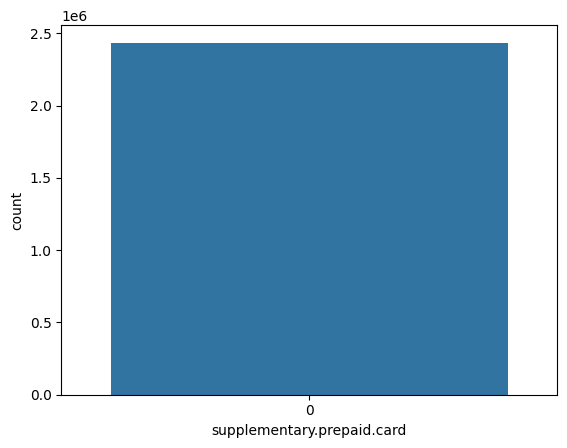

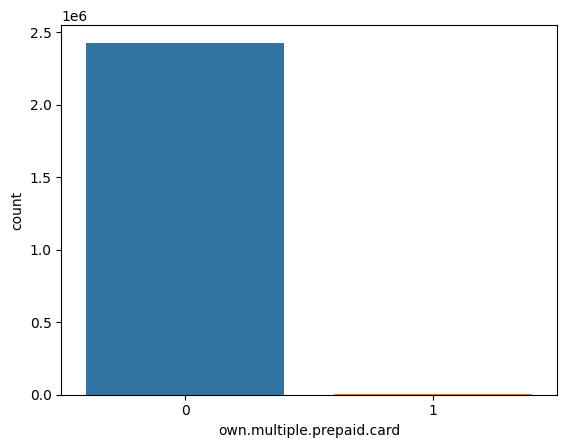

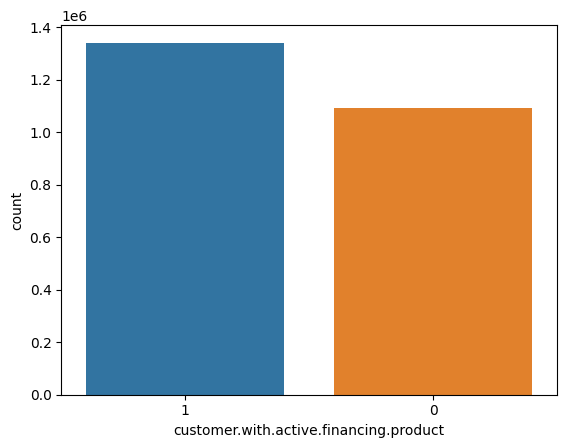

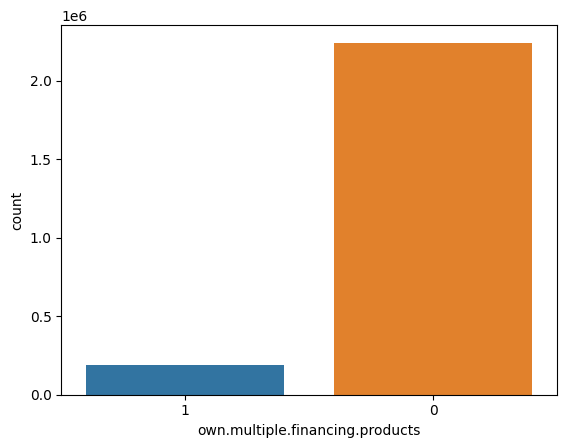

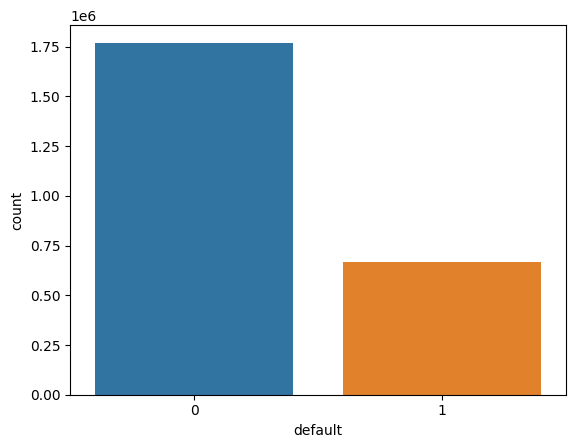

In [38]:
plot_cat(cat_df, little_unique_value)

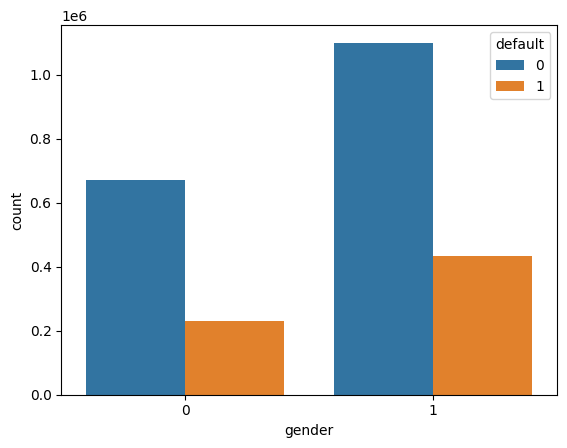

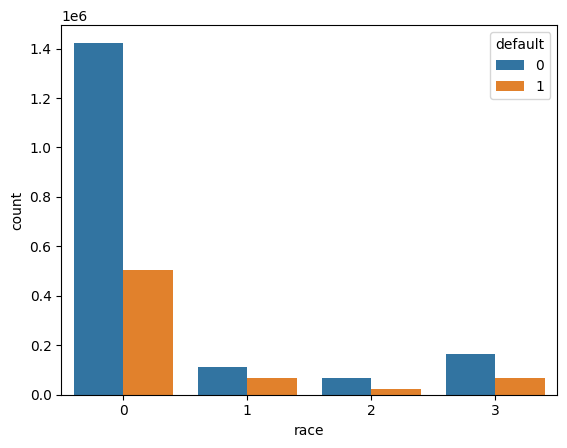

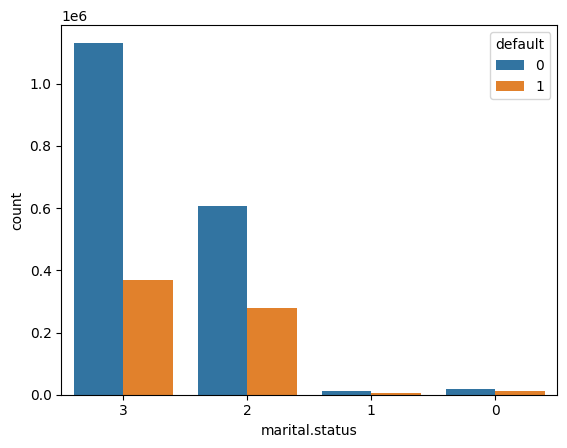

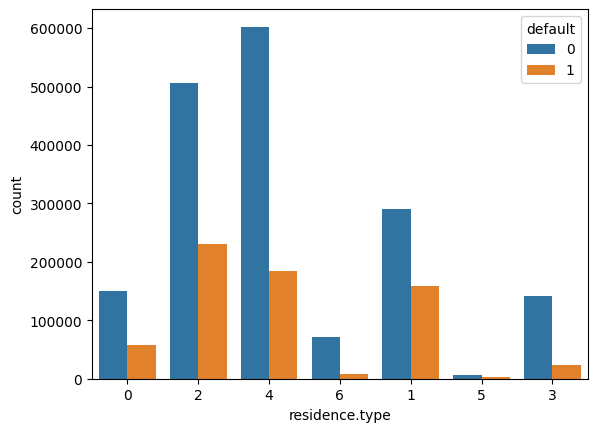

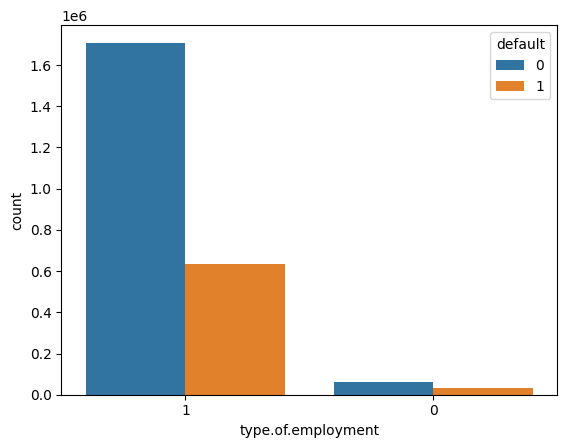

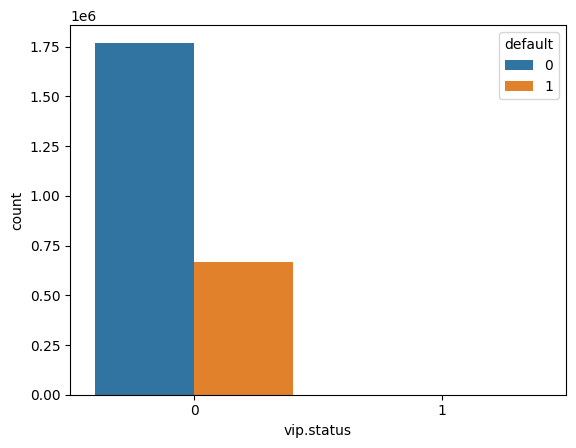

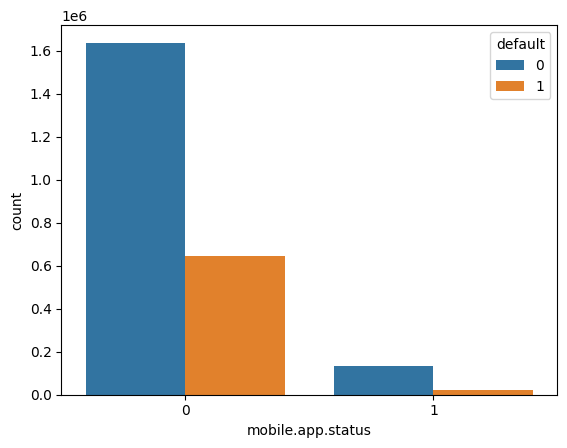

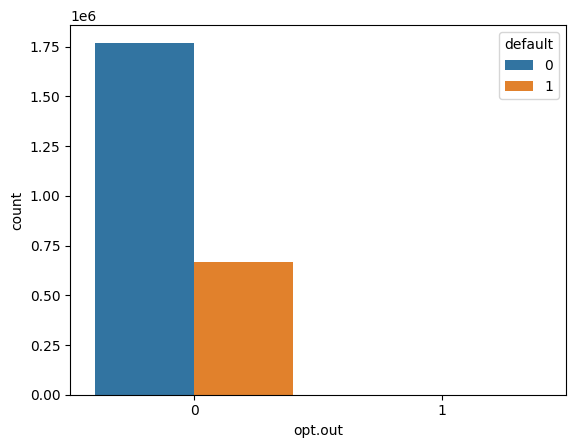

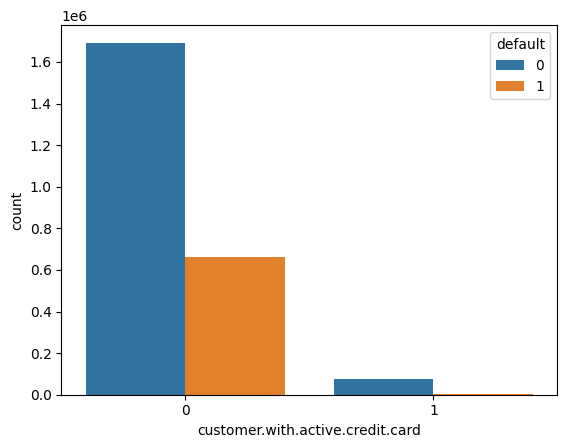

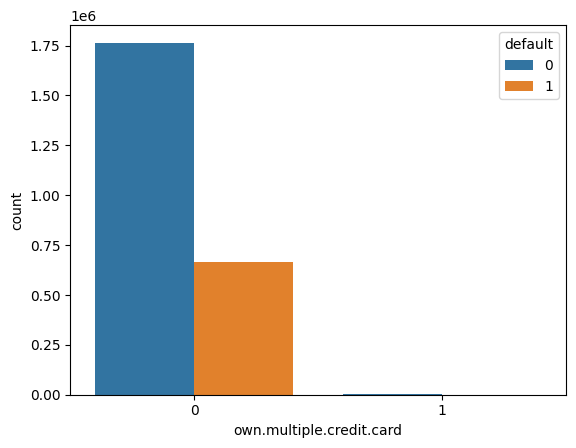

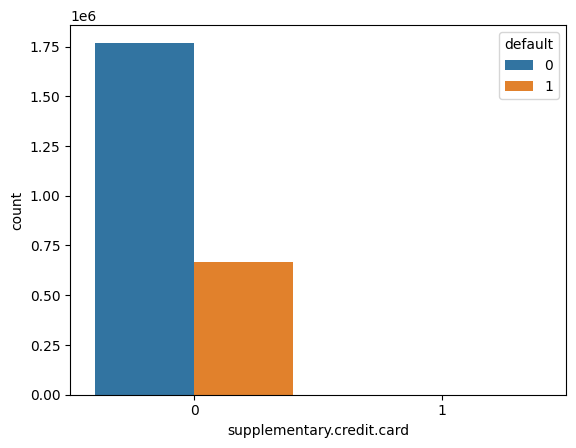

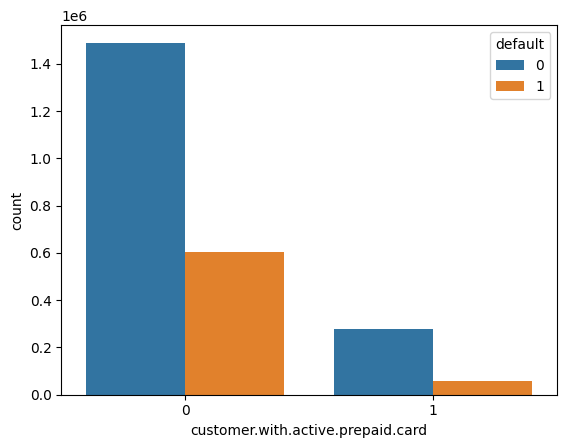

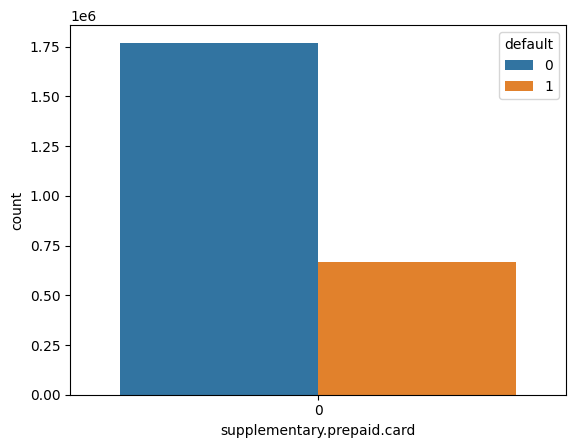

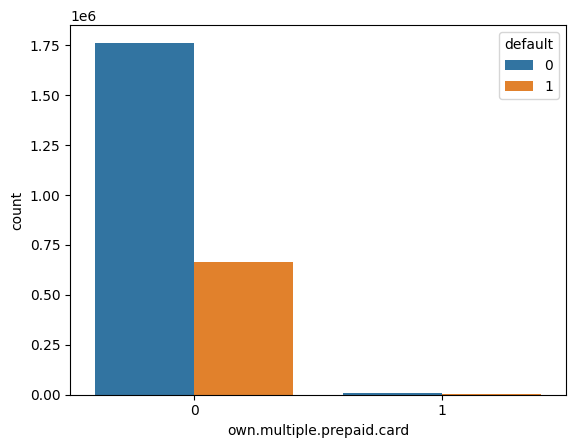

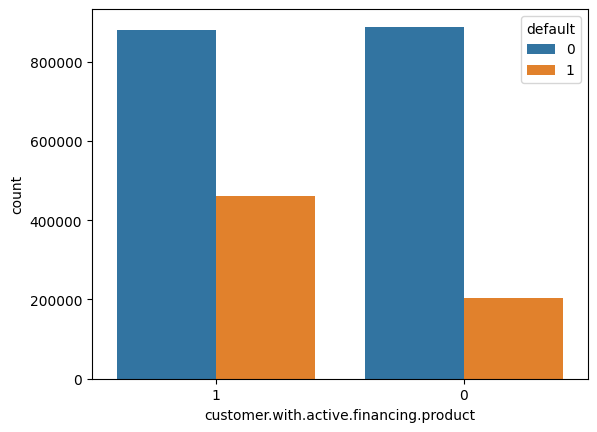

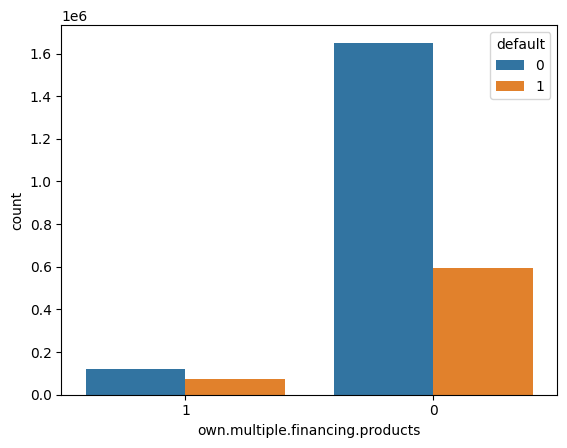

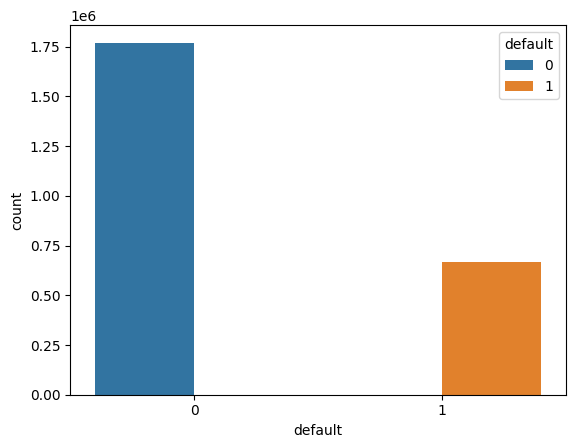

In [39]:
# To visualize the correlation between the features and target variable
for j in little_unique_value:
    plt.figure()
    sns.countplot(x=cat_df[j], hue=cat_df['default'])
    plt.show()

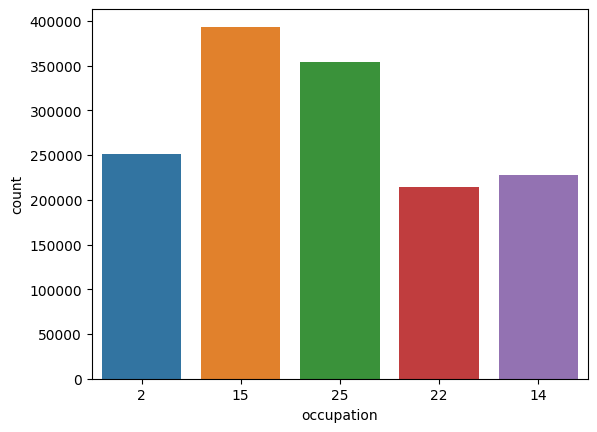

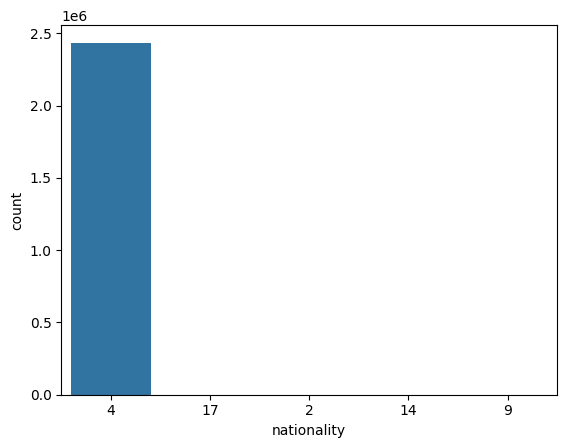

In [40]:
# Plotting for top 5 based on value counts
plot_top_categories(cat_df, many_unique_value)

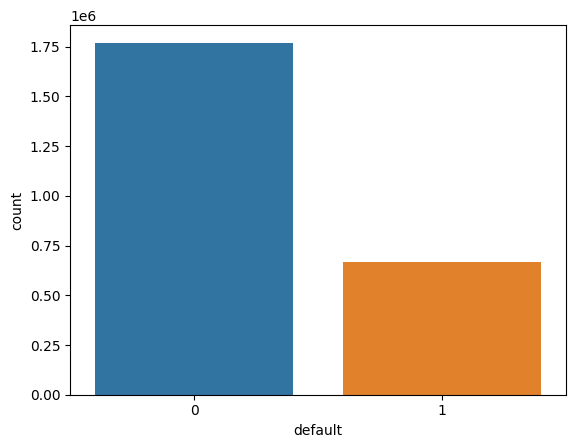

In [41]:
plt.figure()
sns.countplot(x='default', data = df_new_cleaned_SD)
plt.show()

As we can see in the `default` chart, the value between 0 and 1 is imbalance. Therefore, we need to deal with the imbalance data because the imbalance data can affect the machine learning model during model training to be biased towards the majority class.

In [42]:
df_new_cleaned_SD['default'].value_counts()

default
0    1769284
1     665085
Name: count, dtype: int64

In [43]:
665085/1769284

0.37590629881918336

## Correlation analysis

For correlation analysis, we want to check wether the feature columns are correlated with the target column; `default`. Since the features columns consist of categorical columns and numerical columns, we wil performed 2 correlation analysis.

1.   Cramer's V: To check the correlation between categorical features to the target column
2.   Logistic Regression: To check the correlation between numerical features to the target column.



In [44]:
import scipy.stats as ss
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

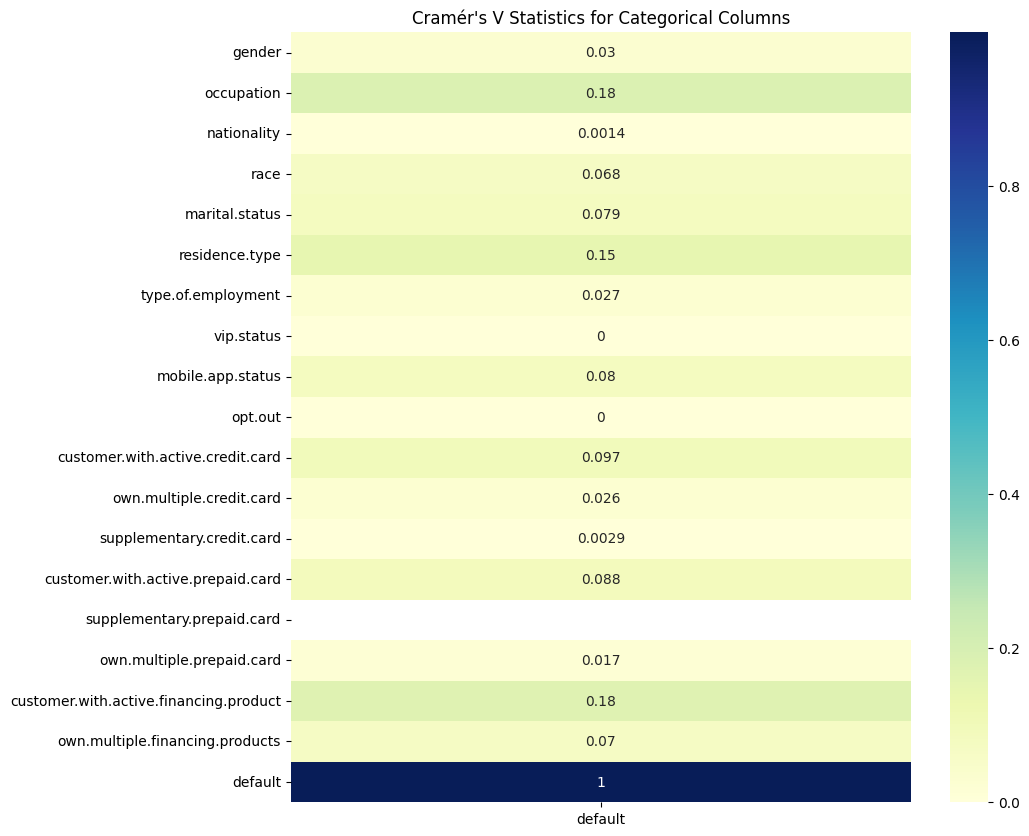

In [45]:
cramers_v_dict = {}

for cat in cat_columns:
    confussion_mat = pd.crosstab(df_new_cleaned_SD[cat], df_new_cleaned_SD['default']).to_numpy()
    cramers_v_dict[cat] = cramers_corrected_stat(confussion_mat)

cramers_v_df = pd.DataFrame.from_dict(cramers_v_dict, orient='index', columns=['default'])

plt.figure(figsize=(10, 10))
sns.heatmap(cramers_v_df, annot=True, cmap='YlGnBu')
plt.title('Cramér\'s V Statistics for Categorical Columns')
plt.show()

It seems like most of the categorical features has low correlation to the target columns. The result is expected because the variation of the categorical feature's values is minimal.

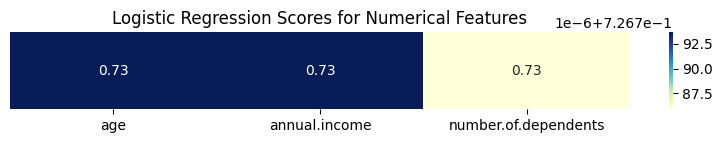

In [46]:
from sklearn.linear_model import LogisticRegression

logreg_scores = {}

# continuous(features) vs categorical target('INS_FLAG') using LogReg
for con in con_columns:
    logreg = LogisticRegression()
    logreg.fit(np.expand_dims(df_new_cleaned_SD[con],axis=-1),
               df_new_cleaned_SD['default'])
    logreg_scores[con] = logreg.score(np.expand_dims(df_new_cleaned_SD[con],axis=-1), df_new_cleaned_SD['default'])

logreg_scores_df = pd.DataFrame.from_dict(logreg_scores, orient='index', columns=['LogReg_Score'])
logreg_scores_2d = logreg_scores_df['LogReg_Score'].values[np.newaxis, :]

plt.figure(figsize=(10, 1))
sns.heatmap(logreg_scores_2d, annot=True, cmap='YlGnBu', yticklabels=False, xticklabels=logreg_scores_df.index)
plt.title('Logistic Regression Scores for Numerical Features')
plt.show()

It seems all of the numerical features highly correlated with the target variables.

As a conclusion, we are going to select the only features that has correlation (>0.1) with the target variable:


1.   `occupation`
2.   `residence.type`
3.   `customer.with.active.credit.card`
4.   `customer.with.active.financing.product`
5.   `age`
6.   `annual.income`
7.   `number.of.dependents`


In [47]:
for column in cat_columns:
    df_new_cleaned_SD[column] = df_new_cleaned_SD[column].astype(int)
df_new_cleaned_SD.dtypes

gender                                      int64
occupation                                  int64
nationality                                 int64
race                                        int64
marital.status                              int64
age                                         int64
residence.type                              int64
type.of.employment                          int64
annual.income                             float64
vip.status                                  int64
number.of.dependents                      float64
mobile.app.status                           int64
opt.out                                     int64
customer.with.active.credit.card            int64
own.multiple.credit.card                    int64
supplementary.credit.card                   int64
customer.with.active.prepaid.card           int64
supplementary.prepaid.card                  int64
own.multiple.prepaid.card                   int64
customer.with.active.financing.product      int64


## Data Preprocessing

1.   Scale the numerical data
2.   train_test_split



In [48]:
# Since the continuous features still contain outliers, we will use Standard Scaler since the scaler is less sensitive to outliers.
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
for con in con_columns:
  df_new_cleaned_SD[con] = std.fit_transform(df_new_cleaned_SD[con].values.reshape(-1, 1))

In [49]:
X = df_new_cleaned_SD[['occupation', 'residence.type', 'customer.with.active.credit.card', 'customer.with.active.financing.product', 
                       'age', 'annual.income', 'number.of.dependents']]
y = df_new_cleaned_SD['default']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=7)

len(X_train), len(X_test), len(y_train), len(y_test)

(1947495, 486874, 1947495, 486874)

### How to deal with the imbalance data.

---
As we can see the visualization for `default` column, the ratio between value `1` and `0` is 1:3. Therefore, the target column is imbalance, where it will make the model bias towards the majority class (`default` = 0). There are ~two~ **multiple** ways to deal with the imbalance data:
1.   Oversampling (SMOTE): add artificial data to the smaller class [eg: add artifical data to `default` 0]
2.   Undersample (RUS): cut some of the data to the largest class [eg: cut off a proportion of the data of `default` 1]

To make the soon-to-be-developed model reflecting a real-world data, we will only use `2`.

In [51]:
!pip install imblearn

### Undersampling

Current ratio between `1` and `0` is 1:3, We are going to undersample the majority label to ratio 1:2

In [52]:
print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.5,random_state = 69)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train.ravel())

print('After UnderSampling, the shape of train_X: {}'.format(X_train_rus.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_rus.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_rus == 1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_rus == 0)))

Before UnderSampling, counts of label '1': 532148
Before UnderSampling, counts of label '0': 1415347 

After UnderSampling, the shape of train_X: (1596444, 7)
After UnderSampling, the shape of train_y: (1596444,) 

After UnderSampling, counts of label '1': 532148
After UnderSampling, counts of label '0': 1064296


## Modelling

For machine learning model, this case study is a classification problem, where the outcome is in binary and the target variables is imbalance. Ensemble models can often be very effective for imbalanced binary classification problems. Therefore, multiple ensemble models will be tried by using scikit-learn Pipeline.

1.   Gradient Boosting
2.   Random Forest
3.   Decision Tree
4.   Extreme Gradient Boosting
5.   Categorical Boosting



In [53]:
!pip install catboost

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import (
    fbeta_score,
    recall_score,
    precision_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    accuracy_score
    )
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_predict,
    cross_val_score,
    StratifiedKFold
    )

### Pipeline for multiple machine learning models.

In [55]:
# GB
pl_gb = Pipeline([('GBClassifier',GradientBoostingClassifier())])

#RF
pl_rf = Pipeline([('RFClassifier',RandomForestClassifier())])

# Decision Tree
pl_tree = Pipeline([('DTClassifier',DecisionTreeClassifier())])

# XGBoost
pl_xgb = Pipeline([('XGBoost', xgb.XGBClassifier())])

# CB
pl_cb = Pipeline([('CBClassifier',CatBoostClassifier())])

# create pipeline
pipelines = [pl_gb, pl_rf, pl_tree, pl_xgb,
             pl_cb]

# fitting the data
for pipe in pipelines:
    pipe.fit(X_train_rus,y_train_rus)

pipe_dict = {0:'GB',
             1:'RF',
             2:'Tree',
             3:'XGB',
             4:'CB'}

best_result = 0
best_accuracy = 0

# model evaluation
for i,model in enumerate(pipelines):
    print(model)
    print(model.score(X_test,y_test))
    print(classification_report(y_test, model.predict(X_test)))
    print("")
    if model.score(X_test, y_test) > best_accuracy:
        best_accuracy = model.score(X_test,y_test)
        best_pipeline = model
        best_scaler = pipe_dict[i]

print('The best pipeline for dataset will be {} with accuracy of {}'
      .format(best_scaler, best_accuracy))

Learning rate set to 0.24026
0:	learn: 0.6361411	total: 301ms	remaining: 5m
1:	learn: 0.6044900	total: 488ms	remaining: 4m 3s
2:	learn: 0.5859879	total: 658ms	remaining: 3m 38s
3:	learn: 0.5732125	total: 832ms	remaining: 3m 27s
4:	learn: 0.5663506	total: 1.02s	remaining: 3m 22s
5:	learn: 0.5603505	total: 1.21s	remaining: 3m 20s
6:	learn: 0.5556716	total: 1.39s	remaining: 3m 17s
7:	learn: 0.5515504	total: 1.57s	remaining: 3m 15s
8:	learn: 0.5484310	total: 1.75s	remaining: 3m 12s
9:	learn: 0.5460362	total: 1.94s	remaining: 3m 12s
10:	learn: 0.5439981	total: 2.13s	remaining: 3m 11s
11:	learn: 0.5427406	total: 2.31s	remaining: 3m 10s
12:	learn: 0.5418105	total: 2.49s	remaining: 3m 9s
13:	learn: 0.5407841	total: 2.69s	remaining: 3m 9s
14:	learn: 0.5397265	total: 2.89s	remaining: 3m 9s
15:	learn: 0.5385687	total: 3.1s	remaining: 3m 10s
16:	learn: 0.5379648	total: 3.27s	remaining: 3m 9s
17:	learn: 0.5373088	total: 3.44s	remaining: 3m 7s
18:	learn: 0.5367838	total: 3.6s	remaining: 3m 5s
19:	le

Although the result of acuuracy for Categorical Boosting is the best compared to other models, we cannot simply accept the result because the target variable is imbalance, which make the model biased towards the majority class. Another metrics to choose the best model are using precision and recall metrics.

In short, the best model that we can use on the dataset is Extreme Gradient Boosting (XGBoost) since it has the same result as Categorical Booosting while having a better recall result.

### Model fine-tuning and threshold moving using .predict_probab() to increase the recall score.

In [60]:
def best_model(train, test, y_train, y_test, model, params, CV=5, **kwargs):
    param_grid = params
    stf_kf=StratifiedKFold(n_splits=5)
    rscv = RandomizedSearchCV(model,
                            param_distributions=param_grid,
                            cv=stf_kf,
                            n_jobs=-1,
                            scoring='roc_auc',
                            random_state=42)
    rscv.fit(train, y_train, eval_set=[(train, y_train),
                                        (test, y_test)],
                                        verbose = 0)
    best_par=rscv.best_params_
    best_model = rscv.best_estimator_.fit(train,y_train,eval_set=[(train, y_train),
                                                                (test, y_test)],
                                                                verbose = 100)

    # Obtain the predicted probabilities for each class on the test set
    probs=best_model.predict_proba(test)

    # Define a range of threshold values to try
    thresholds = np.arange(0.15, 0.17, 0.01)

    # Initialize variables to store the best threshold and best accuracy
    best_threshold = None
    best_score = 0

    # Iterate over the threshold values and evaluate the model's performance
    for threshold in thresholds:
        y_preds = (probs[:,1] > threshold).astype(int)
        score = accuracy_score(y_test, y_preds)
        if score > best_score:
            best_threshold = threshold
            best_score = score

    # Use the best threshold to predict the test set and evaluate the model's performance
    y_preds = (best_model.predict_proba(test)[:,1] > best_threshold).astype(int)
    F1 = f1_score(y_test, y_preds)
    best_sc = rscv.best_score_
    conf_matrix=confusion_matrix(y_test, y_preds)
    report=classification_report(y_test, y_preds)
    return best_par, best_model, best_sc, F1, conf_matrix, report, best_threshold

In [61]:
train_list=[X_train_rus]
test_list=[X_test]
y_train_list = [y_train_rus]
y_test_list = [y_test]
data_names=['RUS']

models= [xgb.XGBClassifier(n_estimators=500,
                           n_jobs=-1,
                           random_state=30,
                           early_stopping_rounds = 50)]

xgb_param_grid = {
         'learning_rate': np.arange(0.01, 0.11, 0.025),
         'max_depth': np.arange(1, 10, 1),
         'min_child_weight': np.arange(1, 10, 1),
         'colsample_bytree': np.arange( 0.1, 1, 0.05),
         'gamma': np.arange(0.5, 1, 0.1),
         'subsample': np.arange( 0.7, 1, 0.1),
         'scale_pos_weight': [0.5]
         }

params = [xgb_param_grid]

In [62]:
for m,p in zip(models, params):
    for tr,te,name,y_tr, y_test in zip(train_list, test_list, data_names, y_train_list, y_test_list):
        best_m, best_p, best_sc, F1, conf_matrix, report, best_threshold = best_model(tr, te, y_tr, y_test, m, p, CV=5)

        print('best threshold: {}\ndata: {}\nbest model: {}\nbest param: {}\nbest score = {:.2f}\n F1 = {:.2f}\nconfusion matrix: \n{}\
        \n classification report: \n{}'.format(best_threshold, str(name), best_m, best_p, best_sc, F1, conf_matrix, report))
        print('\n***********************************\n')


[0]	validation_0-logloss:0.65961	validation_1-logloss:0.58735
[100]	validation_0-logloss:0.57768	validation_1-logloss:0.50969
[200]	validation_0-logloss:0.56766	validation_1-logloss:0.50110
[300]	validation_0-logloss:0.56427	validation_1-logloss:0.49832
[400]	validation_0-logloss:0.56261	validation_1-logloss:0.49703
[499]	validation_0-logloss:0.56177	validation_1-logloss:0.49637
best threshold: 0.17
data: RUS
best model: {'subsample': 0.8999999999999999, 'scale_pos_weight': 0.5, 'min_child_weight': 2, 'max_depth': 8, 'learning_rate': 0.060000000000000005, 'gamma': 0.7999999999999999, 'colsample_bytree': 0.3500000000000001}
best param: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3500000000000001, device=None,
              early_stopping_rounds=50, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.7999999999999999,
              grow_policy=N

### Re-train XGBoost model using tuned hyperparameter.

[0]	validation_0-logloss:0.65961	validation_1-logloss:0.58735
[50]	validation_0-logloss:0.59600	validation_1-logloss:0.52587
[100]	validation_0-logloss:0.57768	validation_1-logloss:0.50969
[150]	validation_0-logloss:0.57140	validation_1-logloss:0.50427
[200]	validation_0-logloss:0.56766	validation_1-logloss:0.50110
[250]	validation_0-logloss:0.56551	validation_1-logloss:0.49932
[300]	validation_0-logloss:0.56427	validation_1-logloss:0.49832
[350]	validation_0-logloss:0.56337	validation_1-logloss:0.49761
[400]	validation_0-logloss:0.56261	validation_1-logloss:0.49703
[450]	validation_0-logloss:0.56194	validation_1-logloss:0.49649
[500]	validation_0-logloss:0.56177	validation_1-logloss:0.49637
[550]	validation_0-logloss:0.56169	validation_1-logloss:0.49631
[600]	validation_0-logloss:0.56160	validation_1-logloss:0.49624
[650]	validation_0-logloss:0.56143	validation_1-logloss:0.49611
[700]	validation_0-logloss:0.56122	validation_1-logloss:0.49596
[750]	validation_0-logloss:0.56103	validati

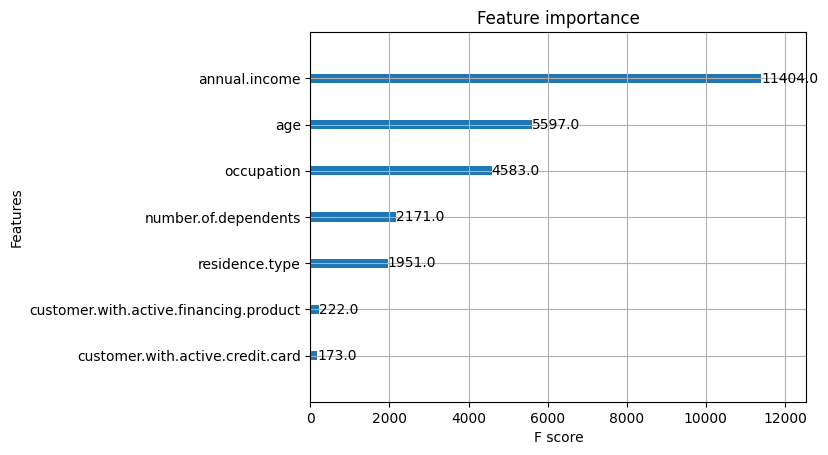

In [66]:
params = {'subsample': 0.8999999999999999, 'scale_pos_weight': 0.5,
          'min_child_weight': 2, 'max_depth': 8,
          'learning_rate': 0.060000000000000005,
          'colsample_bytree': 0.3500000000000001,
          'gamma': 0.7999999999999999,
          'n_estimators':1000, 'n_jobs':-1,
          'random_state':30,'early_stopping_rounds':50}

# create an XGBClassifier
xgb_clf = xgb.XGBClassifier(**params)

# train the classifier on the training set
xgb_clf.fit(X_train_rus, y_train_rus, eval_set=[(X_train_rus, y_train_rus),
                                        (X_test, y_test)],
                                        verbose = 50)

# make predictions on the testing set
y_pred = (xgb_clf.predict_proba(X_test)[:,1] > 0.18).astype(int)

# evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('_________________________________________')

print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('_________________________________________')

print('Classification Report:\n', classification_report(y_test, y_pred))
print('_________________________________________')

# plot the feature importances
xgb.plot_importance(xgb_clf)
plt.show()

# Model performance explanation

The performance of your XGBoost model can be summarized as follows:

1. Confusion Matrix:
- True Positives (TP): 94,381
- True Negatives (TN): 236,562
- False Positives (FP): 117,375
- False Negatives (FN): 38,556

2. Classification Report:
- Precision for class 1 (credit card loan defaults = `Yes`): 0.45
- Recall for class 1: 0.71
- F1-score for class 1: 0.55
- Overall accuracy: 0.68

3. Interpretation:
- The model performs reasonably well in identifying credit card loan defaults (class 1) with a recall of 0.71.
- However, precision for class 1 is relatively low (0.45), indicating that some non-default cases are misclassified as defaults.
- Based on the metrics of the deployed model: the accuracy, precision and recall scores are satisfactory, although the target variable is imbalanced. 
- Due to the imbalance data, I am adjusting the classification threshold (currently set at 0.18) to optimize accuracy and recall trade-offs (accuracy is getting lower to get better result for recall metrics). 
- Accuracy-rrecall trade offs is important due to the project objective since higher recall for value 1 means fewer defaults are missed by the model (lower false negatives) since a low recall for defaults (value 1) means that many actual defaults are not being predicted by the model which can be costly because it means the credit company may not take necessary actions to mitigate the risk associated with these potential defaults. 

4. Feature Importance:
- A few features/factors that contributes to the credit card loan defaults = `1` are:
    i. Annual Income
    ii. Age
    iii. Occupation
    iv. Number of dependants
    v. Residence type. 

5. Next Steps/Suggestions:
- Since the total rows of data is considered quite large (2.4 million rows), deep learning algorithms may need to be considered to get a better results since deep learning models are often can capture complex patterns in the data.